# Convolutional Neural Network Architecture
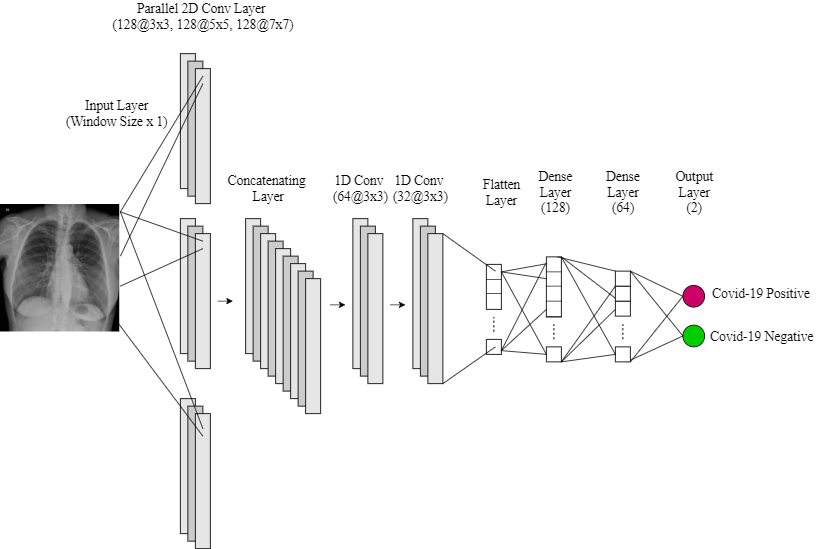

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(input=inp, output=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
C:\Users\Aakash\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, activation="relu", input_shape=(150, 150,..., strides=1, padding="same")`
C:\Users\Aakash\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 5, activation="relu", input_shape=(150, 150,..., strides=1, padding="same")`
C:\Users\Aakash\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 7, activation="relu", input_shape=(150, 150,..., strides=1, padding="same")`
C:\Users\Aakash\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 150, 150, 384)     11008     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 64)      221248    
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)       

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.1)

Train on 1072 samples, validate on 120 samples
Epoch 1/5
1072/1072 [==============================] - 437s 407ms/step - loss: 0.6533 - accuracy: 0.6670 - val_loss: 0.5583 - val_accuracy: 0.7083
Epoch 2/5
1072/1072 [==============================] - 449s 419ms/step - loss: 0.5610 - accuracy: 0.7257 - val_loss: 0.4685 - val_accuracy: 0.8000
Epoch 3/5
1072/1072 [==============================] - 453s 422ms/step - loss: 0.4692 - accuracy: 0.7612 - val_loss: 0.3869 - val_accuracy: 0.8167
Epoch 4/5
1072/1072 [==============================] - 440s 411ms/step - loss: 0.4178 - accuracy: 0.7910 - val_loss: 0.3509 - val_accuracy: 0.8250
Epoch 5/5
1072/1072 [==============================] - 428s 399ms/step - loss: 0.3979 - accuracy: 0.7938 - val_loss: 0.3491 - val_accuracy: 0.8167


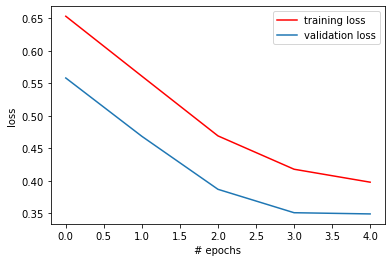

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

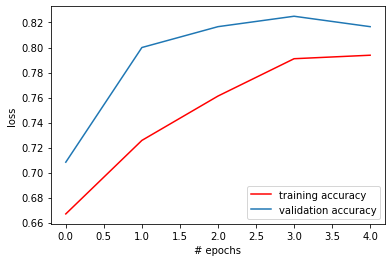

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

133/133 [==============================] - 12s 90ms/step
[0.3394237781377663, 0.8345864415168762]
